# Project 02 - Image Processing

## Student Information

- Full name:
- Student ID:
- Class:

## Required Libraries

In [1]:
# IMPORT YOUR LIBS HERE
import matplotlib.pyplot as plt
import PIL
import numpy as np

## Function Definitions

In [4]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    img = PIL.Image.open(img_path)
    return np.asarray(img)


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img)
    plt.show()


def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    ext = img_path.split('.')[-1].lower()
    if ext in ['png', 'pdf']:
        img.save(img_path, format=ext.upper())
    else:
        print("Unsupported file format. Please use either 'png' or 'pdf'.")


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

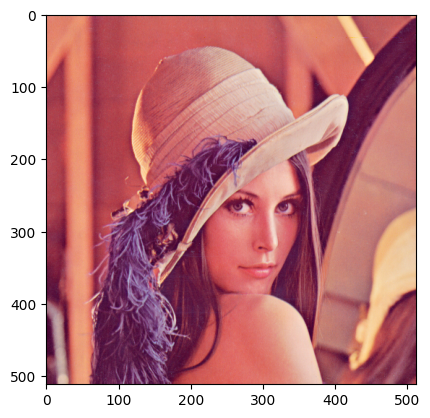

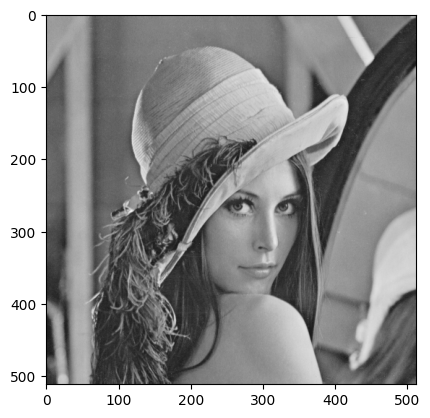

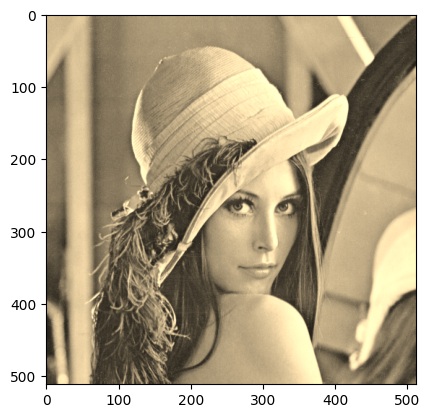

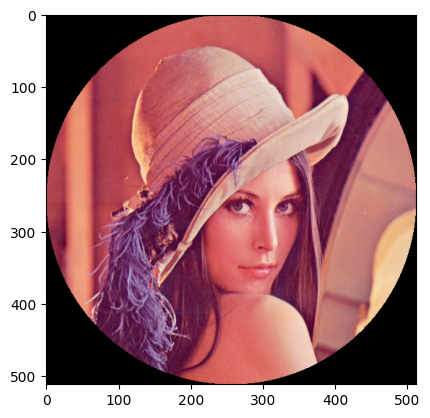

In [10]:
# YOUR CODE HERE
def change_brightness(img, level):
    '''
    Change the brightness of the image

    Parameters
    ----------
    img : np.ndarray
        Image array
    level : int
        Brightness level to be added

    Returns
    -------
    np.ndarray
        Brightness adjusted image
    '''

    # Change to float => avoid overflow
    new_img = img.astype(float) + level

    # Change back to int => normal rbg value
    new_img = np.clip(new_img, 0, 255).astype(int)

    return new_img

def change_contrast(img, level):
    '''
    Change the contrast of the image

    Parameters
    ----------
    img : np.ndarray
        Image array
    level : float
        Contrast adjustment factor.
        Values > 1 increase contrast, values between 0 and 1 decrease contrast.

    Returns
    -------
    np.ndarray
        Contrast adjusted image
    '''

    # Convert image to float to prevent overflow/underflow
    img = img.astype(float)

    # Calculate the mean of the image
    mean = np.mean(img)

    # Apply contrast adjustment
    new_img = mean + level * (img - mean)

    # Clip values to be in the range [0, 255]
    new_img = np.clip(new_img, 0, 255).astype(int)

    return new_img

def flip_image(img, axis):
    '''
    Flip the image along the specified axis

    Parameters
    ----------
    img : np.ndarray
        Image array
    axis : str
        Axis along which to flip the image ('Vertical' or 'Horizontal')

    Returns
    -------
    np.ndarray
        Flipped image
    '''

    if axis == 'Horizontal':
        new_img = img[::-1]
    if axis == 'Vertical':
        new_img = img[:, ::-1]
    return new_img

def green_blue_yellow_scaling_image(img):
    gby_img = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]
    gby_img = gby_img.astype(np.uint8)
    return gby_img

def grayscaling_image(img):
    '''
    Convert an RGB image to grayscale using manual computation

    Parameters
    ----------
    img : np.ndarray
        RGB image array

    Returns
    -------
    np.ndarray
        Grayscale image
    '''

    # img = img.astype(float)
    # Calculate the gray value
    gray_pixels = np.dot(img[..., 0:3].astype(float), [0.2989, 0.5870, 0.1140])

    # Put the gray value across the rgb
    gray_img = np.stack((gray_pixels, gray_pixels, gray_pixels), axis=-1)

    # Over/Underflow  check
    gray_img = np.clip(gray_img, 0, 255)

    return gray_img.astype(int)

def add_sepia_filter(img):
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                            [0.349, 0.686, 0.168],
                            [0.272, 0.534, 0.131]])

    sepia_red_pixels = np.dot(img[..., 0:3], sepia_filter[0])
    sepia_green_pixels = np.dot(img[..., 0:3], sepia_filter[1])
    sepia_blue_pixels = np.dot(img[..., 0:3], sepia_filter[2])

    sepia_img = np.stack((sepia_red_pixels, sepia_green_pixels, sepia_blue_pixels), axis=-1)

    sepia_img = np.clip(sepia_img, 0, 255)

    return sepia_img.astype(int)

def 

def crop_circle(img):
    h, w = img.shape[0], img.shape[1]
    r = h//2

    center_x, center_y = h//2, w//2

    Y, X = np.ogrid[:h, :w]

    # Contrast the coordinate within the circle(0 and 1)
    mask = (X - center_x)**2 + (Y - center_y)**2 <= r**2

    new_img = img * mask[:, :, np.newaxis]

    return new_img

#   https://techmaster.vn/posts/35474/convolution-tich-chap-giai-thich-bang-code-thuc-te
# https://www.youtube.com/watch?v=8rrHTtUzyZA
test_img_path = "Picture/Test/test10.png"
# C:\Users\Binh Minh\OneDrive - MSFT\Documents\HCMUS\Year 2\Applied_Math\Picture\Test\test9.png
img = read_img(test_img_path)
show_img(img)


# brightness_img = change_brightness(img, -100)
# show_img(brightness_img)

# contrast_img = change_contrast(img, 0.5)
# show_img(contrast_img)

# vertical_img = flip_image(img, 'Vertical')
# show_img(vertical_img)

# horizontal_img = flip_image(img, 'Horizontal')
# show_img(horizontal_img)

gray_scaled_img = grayscaling_image(img)
show_img(gray_scaled_img)

sepia_img = add_sepia_filter(img)
show_img(sepia_img)

circle_img = crop_circle(img)
show_img(circle_img)


## Main FUNCTION

In [ ]:
# YOUR CODE HERE

In [ ]:
# Call main function